#Este notebook é uma demonstração de como utilizar o python para calcular distância entre exemplos e clássificá-los com base em distância (KNN)

Utilizaremos para esta finalidade 4 bibliotecas importantíssimas para manipulação de dados em python: pandas, scikit-learn, numpy e scipy.

# Introdução aos calculos de distância

-------------------------------------------------
Documentação: https://pandas.pydata.org/docs/user_guide/10min.html#min
-------------------------------------------------

#Introdução ao seaborn
-------------------------------------------------
Documentação: https://seaborn.pydata.org/introduction.html
-------------------------------------------------

#Documentação distancias scipy
-------------------------------------------------
Documentação: https://github.com/scipy/scipy/blob/main/scipy/spatial/distance.py
-------------------------------------------------

##Distância euclidiana utilizando numpy

In [ ]:
import numpy as np
a = np.array((1, 2, 3))
b = np.array((1, 2, 4))

In [ ]:
dist = np.sqrt(np.sum(np.square(a-b)))

print(dist)

1.0


## scipy



A biblioteca scipy tem muitas funções para cálculos matemáticos e científicos. A função distance.euclidean() retorna a distância euclidiana entre dois pontos.

In [ ]:
from scipy.spatial import distance

### Distância de manhattan

In [ ]:
def manhattan(u, v):
  return sum(abs(val1-val2) for val1, val2 in zip (u, v))

In [ ]:

u = (1, 2, 3)
v = (4, 5, 6)

print(distance.cityblock(u, v))
print(manhattan(u, v))

9
9


### Distância euclidiana

In [ ]:
def euclidean(u,v):
  return np.sqrt(np.sum(np.square(u-v)))
  

In [ ]:
from scipy.spatial import distance
u = [1, 2, 3]
v = [4, 5, 6]

print(distance.euclidean(u, v))
u = np.array(u)
v = np.array(v)
print(euclidean(u,v))

5.196152422706632
5.196152422706632


### Distância de chebyshev 

In [ ]:
def chebyshev(u, v, w=None):
    """
    Compute the Chebyshev distance.
    Computes the Chebyshev distance between two 1-D arrays `u` and `v`,
    which is defined as
    .. math::
       \\max_i {|u_i-v_i|}.
    Parameters
    ----------
    u : (N,) array_like
        Input vector.
    v : (N,) array_like
        Input vector.
    Returns
    -------
    chebyshev : double
        The Chebyshev distance between vectors `u` and `v`.
    """
    return max(abs(u - v))

In [ ]:
from scipy.spatial import distance
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

print(distance.chebyshev(u, v))
print(chebyshev(u,v))

3
3


### Distância de minkowski

In [ ]:
from scipy.linalg import norm
def minkowski(u, v, p=2):
    """
    Compute the Minkowski distance between two 1-D arrays.
    The Minkowski distance between 1-D arrays `u` and `v`,
    is defined as
    .. math::
       {\\|u-v\\|}_p = (\\sum{|u_i - v_i|^p})^{1/p}.
       \\left(\\sum{w_i(|(u_i - v_i)|^p)}\\right)^{1/p}.
    Parameters
    ----------
    u : (N,) array_like
        Input array.
    v : (N,) array_like
        Input array.
    p : scalar
        The order of the norm of the difference :math:`{\\|u-v\\|}_p`. Note
        that for :math:`0 < p < 1`, the triangle inequality only holds with
        an additional multiplicative factor, i.e. it is only a quasi-metric.
    w : (N,) array_like, optional
        The weights for each value in `u` and `v`. Default is None,
        which gives each value a weight of 1.0
    Returns
    -------
    minkowski : double
        The Minkowski distance between vectors `u` and `v`.
    """
    
    u_v = u - v
    dist = norm(u_v, ord=p)
    return dist


In [ ]:
from scipy.spatial import distance
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

print(distance.minkowski(u, v))
print(minkowski(u,v))

5.196152422706632
5.196152422706632


## Load do iris pelo kaggle



In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"settebr","key":"71798c39421b8856910ad34ae19ae95f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!mkdir -p data/iris
!unzip iris.zip -d data/iris

mkdir: cannot create directory ‘/root/.kaggle’: File exists
iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iris.zip
replace data/iris/Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/iris/Iris.csv      
replace data/iris/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/iris/database.sqlite  


In [ ]:
import pandas as pd
df = pd.read_csv("data/iris/Iris.csv",index_col="Id")

In [ ]:
display(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
def get_neighbors(train, test_row, k_neighbors=5):
  '''
    Calcula os k-vizinhos mais próximos utilizando a distância euclidiana

    Os k-vizinhos mais próximos de um exemplo v é deifinido por:

    Parameters

    x : (N,M) train
        Pandas Dataframe.

    v : (N,) test_row
        List.

    w : N k_neighbors, optional
        Por padrão, o valor de vizinhos próximos é 5

    Returns

    neighbors : list
        Os k vizinhos mais próximos do exemplo v. Tupla (exemplo, distância).
    '''
  distances = [(train_row.values,distance.euclidean(test_row, train_row[:-1].values))
               for _,train_row in train.iterrows()]
  distances.sort(key=lambda x: x[1])
  neighbors = distances[:k_neighbors]
  neighbors = [neighbor[0] for neighbor in neighbors]
  return neighbors

In [ ]:
def predict(train, test_row, num_neighbors):
  '''
    Classifica um exemplo com kabse nos k-vizinhos mais próximos

    O rótulo do exemplo v é deifinido por:

    Parameters

    x : (N,M) train
        Pandas Dataframe.

    v : (N,) test_row
        List.

    w : N k_neighbors, optional
        Por padrão, o valor de vizinhos próximos é 5

    Returns

    neighbors : list
        Os k vizinhos mais próximos do exemplo v. Tupla (exemplo, distância).
    '''
  neighbors = get_neighbors(train, test_row, num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction
 

In [ ]:
num_neighbors = 5
row = [5.7,2.9,4.2,1.3]
label = predict(df, row, num_neighbors)
row.append(label)
df_result = pd.DataFrame(data=np.array([row]),columns=df.columns.to_list())
display(df_result)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.7,2.9,4.2,1.3,Iris-versicolor


In [ ]:
from scipy.spatial import distance
class knn:
  def __init__(self):
    print("Knn instanciado")

  def fit(self,train):
    self.train = train
  
  def calculate_distances(self):
    self.distances = [(train_row.values,chebyshev(self.test, train_row[:4].values))
               for _,train_row in self.train.iterrows()]
    self.distances.sort(key=lambda x: x[1])
    print(f'Distancias calculadas')    
  
  def calculate_k_neighbors(self):
    self.neighbors = self.distances[:self.k_neighbors]
    self.neighbors = [neighbor[0] for neighbor in self.neighbors]
    
    
  def predict(self,test, k_neighbors: int):
    self.test = test
    self.k_neighbors = k_neighbors
    self.calculate_distances()
    self.calculate_k_neighbors()
    output_values = [neighbor[-1] for neighbor in self.neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [ ]:
num_neighbors = 5
row = [6.5,	3.0,	5.2,	2.0]
cls = knn()
cls.fit(df)

Knn instanciado


In [ ]:
cls.predict(row,num_neighbors)

Distancias calculadas


'Iris-virginica'

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
cls.predict([5.1,	3.5,1.4,0.2],5)

Distancias calculadas


'Iris-setosa'

In [ ]:
# matriz de covariancia
df_covariance = df.cov()

# matriz de correlação
df_correlation = df.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414




Matriz de correlação: 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


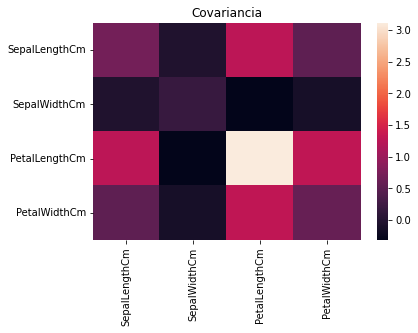

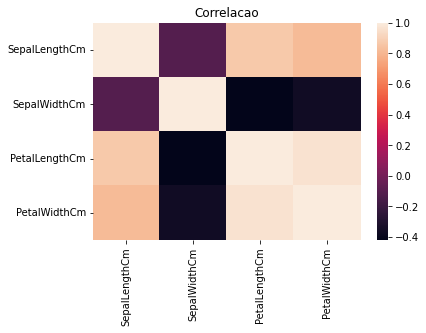

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# cria um mapa de cores dos valoes da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, 
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()